In [28]:
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function

In [29]:
 # Matrix Y, containing all possilbe edges
 Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

alpha = 5 # Define alpha
mu = np.zeros(2) # Define mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # Define covariance matrix
num_samples = 4  # Number of samples you want to generate

In [30]:
def Loss_function(point):
    alpha = 5 # Define Alpha
    result = 0 # Define result for the Loss_function

    for m in range(len(Y)): # Run over all "edges"
        connection = Y[m][0] # Check to see if there is a connection
        point_1 = point[Y[m][1]] # Define coordinates for vertex 1
        point_2 = point[Y[m][2]] # Define coordinates for vertex 2
        distance = np.linalg.norm(point_1 - point_2) ** 2 # Calculate the euclidean distance squared
        sigmoid_value = 1 / (1 + np.exp(-connection * (alpha - distance))) # Calculate the sigmoid function
        result += np.log(sigmoid_value) # Sum all the probabilities 

    return result

In [31]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    # Use Autograd
    grad_func = value_and_grad(Loss_function)
    Autograd = grad_func(point)

    # Use Gradient_function
    grad_matrix = np.array([[Gradient_function(1,0,Y,point), Gradient_function(1,1,Y,point)],
                            [Gradient_function(2,0,Y,point), Gradient_function(2,1,Y,point)],
                            [Gradient_function(3,0,Y,point), Gradient_function(3,1,Y,point)],
                            [Gradient_function(4,0,Y,point), Gradient_function(4,1,Y,point)]])
    # Caculate the error
    hist[n] = np.sum(Autograd[1][1]-grad_matrix[0]+Autograd[1][2]-grad_matrix[1]+Autograd[1][3]-grad_matrix[2]+Autograd[1][4]-grad_matrix[3])


(array([  2.,   1.,   2.,   1.,   4.,   4.,  13.,   2.,   6.,  12.,  18.,
         55.,  30.,  64.,  45., 157., 251., 115.,  83.,  36.,  41.,  12.,
          4.,  16.,   4.,  17.,   1.,   1.,   0.,   3.]),
 array([-6.21724894e-15, -5.83237162e-15, -5.44749431e-15, -5.06261699e-15,
        -4.67773968e-15, -4.29286236e-15, -3.90798505e-15, -3.52310773e-15,
        -3.13823042e-15, -2.75335310e-15, -2.36847579e-15, -1.98359847e-15,
        -1.59872116e-15, -1.21384384e-15, -8.28966525e-16, -4.44089210e-16,
        -5.92118946e-17,  3.25665421e-16,  7.10542736e-16,  1.09542005e-15,
         1.48029737e-15,  1.86517468e-15,  2.25005200e-15,  2.63492931e-15,
         3.01980663e-15,  3.40468394e-15,  3.78956126e-15,  4.17443857e-15,
         4.55931589e-15,  4.94419320e-15,  5.32907052e-15]),
 <BarContainer object of 30 artists>)

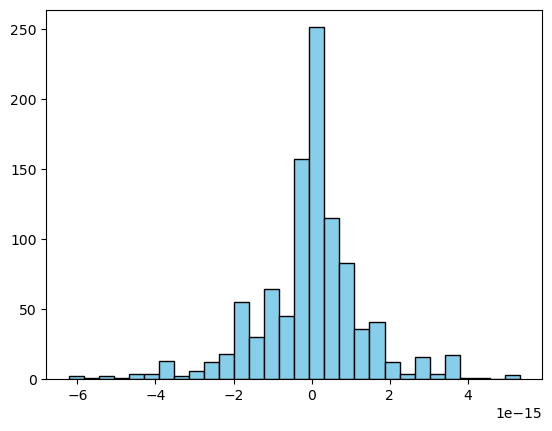

In [32]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')